# Librerias y carga de base de datos

In [ ]:
#Importamos las paqueterias que se van a utilizar para la practica
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
#Cargamos la base de datos de boston
boston = datasets.load_boston()
print("Informacion del dataset")
print(boston.keys())

Informacion del dataset
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Describimos las caracteristicas del Dataset
print("Caracteristicas del Dataset")
print(boston.DESCR)

Caracteristicas del Dataset
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $

In [ ]:
#Conocemos las dimensiones de nuestra base de datos
print("Cantida de datos")
print(boston.data.shape)

Cantida de datos
(506, 13)


In [ ]:
#Aqui mostramos las etiquetas
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Modelo de regresion lineal

In [ ]:
X = boston.data[:,np.newaxis,5]
y = boston.target

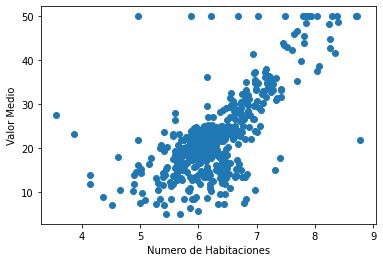

In [ ]:
plt.scatter(X,y)
plt.xlabel("Numero de Habitaciones")
plt.ylabel("Valor Medio")
plt.show()

# Entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

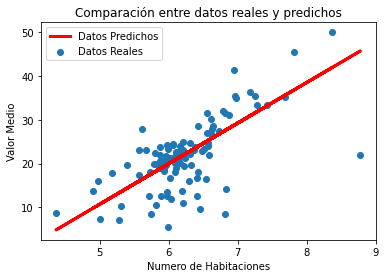

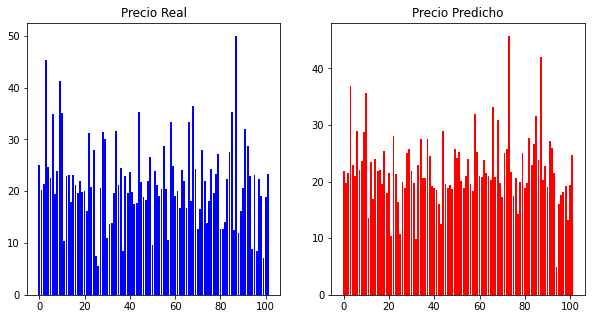

In [ ]:
plt.scatter(X_test, y_test, label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Datos Predichos')
plt.xlabel("Numero de Habitaciones")
plt.ylabel("Valor Medio")
plt.title("Comparación entre datos reales y predichos")
plt.legend()
plt.show()

x = range(len(y_test))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(x, y_test, color='blue')
axs[0].set_title('Precio Real')
axs[1].bar(x, y_pred, color='red')
axs[1].set_title('Precio Predicho')

plt.show()

In [ ]:
def color_cell(val):
    color = 'blue' if val['y_test'] >= val['y_pred'] else 'red'
    return 'color: %s' % color



In [ ]:

data = {'y_test': y_test, 'y_pred': y_pred}

df = pd.DataFrame(data)
df.style.applymap(color_cell, subset=['y_test', 'y_pred'])

print(df)

     y_test     y_pred
0      25.0  21.935023
1      20.3  19.720875
2      21.4  21.490340
3      45.4  36.841149
4      24.6  22.898501
..      ...        ...
97     22.4  18.192279
98     19.1  19.294720
99      7.2  13.282243
100    18.9  19.359570
101    23.3  24.705024

[102 rows x 2 columns]


In [ ]:
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la interseccion o coeficiente "b": ')
print(lr.intercept_)

Valor de la pendiente o coeficiente "a":
[9.26421793]
Valor de la interseccion o coeficiente "b": 
-35.60503495652271


In [ ]:
print('La ecuacion del modelo es igual a: ')
print('y = ', lr.coef_, 'x ', lr.intercept_)

La ecuacion del modelo es igual a: 
y =  [9.26421793] x  -35.60503495652271


In [ ]:
print('Precision del modelo: ', lr.score(X_train, y_train))

Precision del modelo:  0.4895519436791226


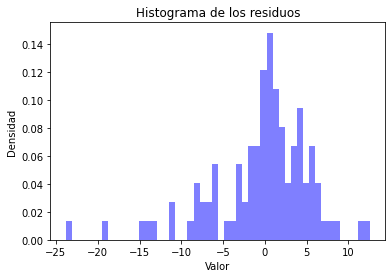

In [ ]:
# Calcula los residuos
residuals = y_test - y_pred

# Gráfica el histograma de los residuos
plt.hist(residuals, bins=50, density=True, alpha=0.5, color='blue')
plt.title('Histograma de los residuos')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()


In [ ]:
print(residuals)

[  3.06497741   0.57912549  -0.09034013   8.55885076   1.70149874
   1.58213498   5.88711491  -2.70177852   0.31594662  12.58356988
  -0.44606513  -3.13237693  -0.42656168   6.17691931  -5.97315054
   1.28350584  -0.92957117   0.06250345  -3.44616119   1.8393269
  -1.427397     5.6340792    3.12280092  -0.47726312  11.55130082
  -3.31605468 -14.25983778   1.8148115    6.40587909   4.39444071
 -10.95164463  -6.2227809    3.9547818   -3.40040765   4.06012556
   0.58049635   3.82681744 -19.21398818  -1.61973939   0.2960153
   4.9592262    1.45758757   1.51260532   5.36080078   6.45196444
   2.08103189  -0.0426802   -1.01324892   3.22407572   0.7832701
 -14.65107707  -1.30719792   1.04370725   0.23143354  -0.54565767
   4.73611368   0.88103189  -7.79418495   1.39667892  -0.41455574
  -1.93639345  -0.76037331  -7.08786618   2.61892409   0.91919185
  -3.43040649   0.26453793  -2.66963753   5.50647867   4.49574753
  -4.62144206  -8.48295029   2.0832701  -23.83479845  -7.96826667
   0.74885888